### Install library

In [1]:
!pip install opencv-python
!pip install facenet-pytorch

You should consider upgrading via the '/home/jovyan/.venv/torch1.5.1-py3.6-cuda10.1/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/jovyan/.venv/torch1.5.1-py3.6-cuda10.1/bin/python -m pip install --upgrade pip' command.


In [2]:
import cv2
import sys
import os
from facenet_pytorch import MTCNN
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch

/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload

/home/jovyan/.venv/torch1.5.1-py3.6-cuda10.1/lib/python3.6/site-packages
/home/jovyan/.local/lib/python3.6/site-packages
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
/home/jovyan/.ipython


### Rename images

In [3]:
file_path = '/home/jovyan/cs470-deep-face-classifier/full_data/raw/'

In [4]:
for i in ['dog','cat', 'bear', 'dinosaur', 'bald', 'rabbit']:
    file_path_i = file_path + i
    filenames_i = os.listdir(file_path_i)
    print(filenames_i)

['박보영', '손예진', '아이유', '송중기', '임시완', '엑소 백현', '워너원 강다니엘', '태연', '박보검', '한효주']
['김희선', '유인영', '엑소 시우민', '워너원 황민현', '이종석', '이나영', '이준기', '강동원', '한예슬', '한채영']
['마동석', '박성웅', '곽도원', '정형돈', '조진웅', '안재홍', '조세호', '스윙스', '최자', '김구라']
['한지민', '육성재', '김아중', '김우빈', '윤두준', '공유', '이민기', '천우희', '신민아', '송지효']
['Bald']
['이세영', '트와이스 나연', '방탄소년단 정국', '수지', '안형섭', '워너원 박지훈', '트와이스 다현', '아이콘 바비', '백진희', '엑소 수호']


### Face detect

In [14]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mtcnn = MTCNN(keep_all=True, device=device)

for i in ['dog','cat', 'bear', 'dinosaur', 'rabbit', 'bald']:
    file_path_i = file_path + i
    filenames_i = os.listdir(file_path_i)
    try:
        os.mkdir('/home/jovyan/cs470-deep-face-classifier/full_data/updated/'+i)
    except:
        pass
    for j in filenames_i:
        file_path_j = file_path_i + '/'+j
        files = os.listdir(file_path_j)
        try:
            os.mkdir('/home/jovyan/cs470-deep-face-classifier/full_data/updated/'+i+'/'+j)
        except:
            continue
        m=1
        for k in files:
            src = file_path_j + '/' + k
            try:
                img = Image.open(src)
                boxes, _ = mtcnn.detect(img)
                if len(boxes) != 1:
                    continue
            except:
                continue
            
            x, y, width, height = boxes[0]
            im = np.array(img)
            convert  = im[int(y):int(height),int(x):int(width)]
            dst = '/home/jovyan/cs470-deep-face-classifier/full_data/updated/'+i+'/'+j+'/'+str(m)+'.jpg'
            try:
                gr_im= Image.fromarray(convert).save(dst)
            except:
                continue
            m += 1


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 20 bytes but only got 12. Skipping tag 36868
  " Skipping tag %s" % (size, len(data), tag)


[[332.02966  68.06833 416.5465  181.06596]
 [ 98.09248  81.38732 175.35648 197.38274]]


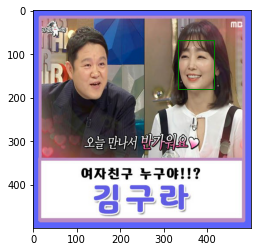

In [19]:
path = '/home/jovyan/cs470-deep-face-classifier/datas/raw/bear/김구라/17.jpg'
img = Image.open(path)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

mtcnn = MTCNN(keep_all=True, device=device)

boxes, _ = mtcnn.detect(img)


plt.imshow(img)

ax = plt.gca()

x, y, width, height = boxes[0]

rect = plt.Rectangle((x, y), width-x, height-y, fill=False, color='green')

ax.add_patch(rect)

plt.show()

im = np.array(img)

convert  = im[int(y):int(height),int(x):int(width)]
gr_im= Image.fromarray(convert).save('/home/jovyan/cs470-deep-face-classifier/new_data/updated/dog/1.jpg')